# Методы контроля температуры в молекулярной динамике

In [ ]:
import __main__
__main__.pymol_argv = [ 'pymol', '-x' ]

import pymol
pymol.finish_launching()

In [2]:
from pymol import cmd,stored

from IPython.display import Image, Video
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chi2
from math import pi
from math import e

В этом практикуме мы будем сравнивать различные методы термостатирования в молекулярной динамике. Необходимость в этих методах возникает из-за того, что в связи с изолированностью моделируемой системы (т.к. окружение не моделируется) в системе поддерживается постоянной внутренняя энергия, а не температура, т.е. система соответствует микроканоническому ансамблю (NVE). В реальности же системы как правило находятся в тепловом равновесии со средой и для их корректного описания надо использовать канонический ансамбль (NVT).

## Моделирование динамики

С помощью GROMACS мы получили четыре траетории динамики молекулы этана, соответствующие четырём методам термостатирования: по Берендсену, velocity rescale, методу Носе-Хувера и стохастической динамике. Далее эти траектории были визуализированы в PyMOL.

In [11]:
cmd.reinitialize()

### По Берендсену

![image](be.gif)

### Velocity rescaling

![image](vr.gif)

### По Носе-Хуверу

![image](nh.gif)

### Стохастическая динамика

![image](sd.gif)

Мы видим, что во всех четырёх случаях молекула этана ведёт себя по-разному - у неё в разной степени возбуждены различные степени свободы. В случае термостата Берендсена колебания происходят только в начале моделирования, а затем вся энергия переходит во врещение вокруг связи CC. В случае Носе-Хувера наоборот вращения оказываются заморожены. При термостатировании методом velocity rescaling все степени свободы выглядят в равной степени возбуждёнными, кроме движений молекулы как целого, которые присутствуют при моделировании методом стохастической динамики (кажущиеся разрывы связей - это артефакт отображения в паймоле, возникающий при пересечении молекулой границы объёма).

## Изменение энергии в ходе моделирования

Поскольку мы моделируем нашу систему в виде канонического ансамбля (NVT), энергия не обязана сохраняться. Также она может переходить из кинетической в потенциальную. Проследим за изменениями кинетической и потенциальной энергии в случае всех четырёх траекторий.

In [4]:
kinetic_energy = np.loadtxt('et_be_ken.xvg')
potential_energy = np.loadtxt('et_be_pen.xvg')

In [5]:
t = kinetic_energy[:, 0]
kin = kinetic_energy[:, 1]
pot = potential_energy[:, 1]

Text(0, 0.5, 'Энергия')

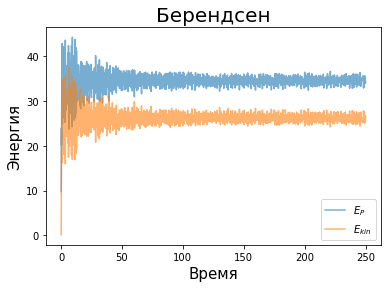

In [6]:
plt.plot(t, pot, label="$E_P$", alpha=0.6)
plt.plot(t, kin, label="$E_{kin}$", alpha=0.6)
plt.legend()
plt.title("Берендсен", fontsize=20)
plt.xlabel("Время", fontsize=15)
plt.ylabel("Энергия",fontsize=15)

Text(0, 0.5, 'Энергия')

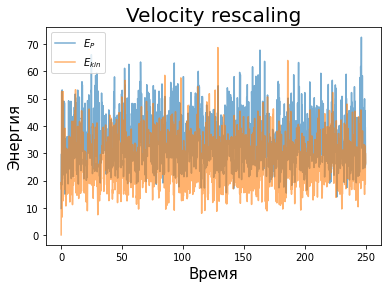

In [3]:
energy = np.loadtxt('et_vr_en.xvg')
t = energy[:, 0]
kin = energy[:, 2]
pot = energy[:, 1]
plt.plot(t, pot, label="$E_P$", alpha=0.6)
plt.plot(t, kin, label="$E_{kin}$", alpha=0.6)
plt.legend()
plt.title("Velocity rescaling", fontsize=20)
plt.xlabel("Время", fontsize=15)
plt.ylabel("Энергия",fontsize=15)

Text(0, 0.5, 'Энергия')

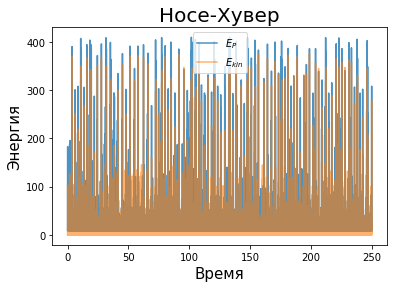

In [8]:
energy = np.loadtxt('et_nh_en.xvg')
t = energy[:, 0]
kin = energy[:, 2]
pot = energy[:, 1]
plt.plot(t, pot, label="$E_P$", alpha=0.8)
plt.plot(t, kin, label="$E_{kin}$", alpha=0.6)
plt.legend()
plt.title("Ноcе-Хувер", fontsize=20)
plt.xlabel("Время", fontsize=15)
plt.ylabel("Энергия",fontsize=15)

Text(0, 0.5, 'Энергия')

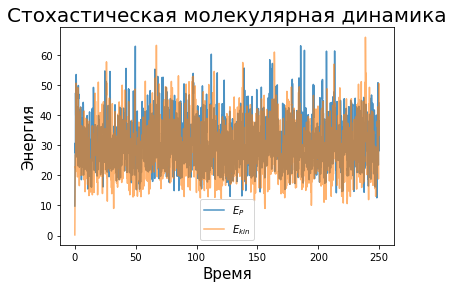

In [9]:
energy = np.loadtxt('et_sd_en.xvg')
t = energy[:, 0]
kin = energy[:, 2]
pot = energy[:, 1]
plt.plot(t, pot, label="$E_P$", alpha=0.8)
plt.plot(t, kin, label="$E_{kin}$", alpha=0.6)
plt.legend()
plt.title("Стохастическая молекулярная динамика", fontsize=20)
plt.xlabel("Время", fontsize=15)
plt.ylabel("Энергия",fontsize=15)

Графики изменения энергии подтверждают наши предыдущие выводы. Из-за того, что в методе Носе-Хувера у нас оказываются возбуждёнными только колебательные степени свободы, а в методе Беренсдена только вращательная, их графики сильно отличаются от графиков для velocity rescaling и стохастической динамики, которые похожи и по форме, и по значениям.

## Длина связи CC

Теперь посмотрим на то, какие значения с какой частотой принимает длина связи CC в случае разных методов термостатирования.

Text(0.5, 0, 'Длина связи CC')

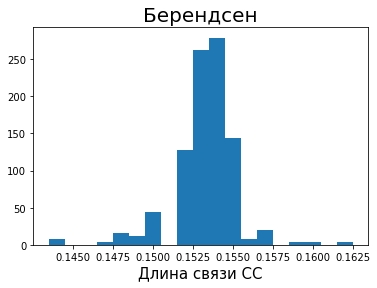

In [22]:
bond = np.loadtxt('bond_be.xvg')
distances = bond[:,0]
distances = distances[bond[:,1]>0]
heights = bond[:,1]
heights = heights[bond[:,1]>0]
plt.bar(distances, heights,width=0.001)
plt.title('Берендсен', fontsize=20)
plt.xlabel('Длина связи CC', fontsize=15)

Text(0.5, 0, 'Длина связи CC')

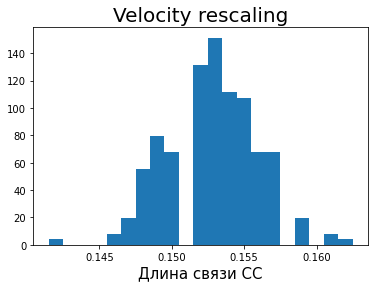

In [4]:
bond = np.loadtxt('bond_vr.xvg')
distances = bond[:,0]
distances = distances[bond[:,1]>0]
heights = bond[:,1]
heights = heights[bond[:,1]>0]
plt.bar(distances, heights,width=0.001)
plt.title('Velocity rescaling', fontsize=20)
plt.xlabel('Длина связи CC', fontsize=15)

Text(0.5, 0, 'Длина связи CC')

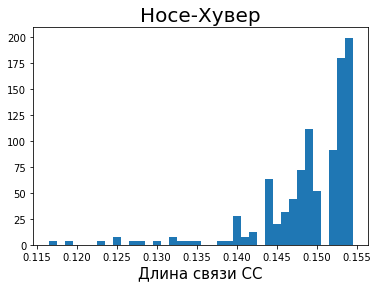

In [27]:
bond = np.loadtxt('bond_nh.xvg')
distances = bond[:,0]
distances = distances[bond[:,1]>0]
heights = bond[:,1]
heights = heights[bond[:,1]>0]
plt.bar(distances, heights,width=0.001)
plt.title('Ноcе-Хувер', fontsize=20)
plt.xlabel('Длина связи CC', fontsize=15)

Text(0.5, 0, 'Длина связи CC')

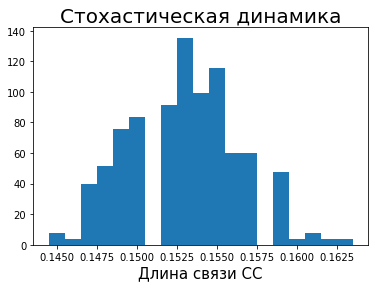

In [26]:
bond = np.loadtxt('bond_sd.xvg')
distances = bond[:,0]
distances = distances[bond[:,1]>0]
heights = bond[:,1]
heights = heights[bond[:,1]>0]
plt.bar(distances, heights,width=0.001)
plt.title('Стохастическая динамика', fontsize=20)
plt.xlabel('Длина связи CC', fontsize=15)

Опять видим сходства в графиках, полученных методами velocity rescale и стохастической динамики.

## Распределение молекул по кинетическим энергиям

Из статистической механики мы знаем, что кинетические энергии большого числа молекул должны подчиняться распределению Максвелла-Больцмана, которое в этом случае выглядит как распределение хи-квадрат с тремя степенями свободы: каждая компонента скорости имеет нормальное распределение, а кинетичсеская энергия - это сумма квадратов трёх компонент. Однако мы в нашем эксперименте можем измерить только кинетические энергии одной и той же молекулы в разные моменты времени. Эти два распределения должны совпадать при условии эргодичности системы (среднее по ансамблю равно среднему по траетории).

Text(0.5, 0, 'Кинетическая энергия')

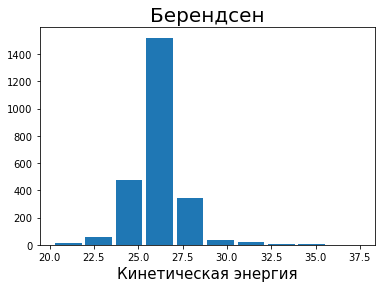

In [10]:
kinetic_energy = np.loadtxt('et_be_ken.xvg')
kin = kinetic_energy[:,1]
kin = kin[kin>20]
plt.hist(kin, width=1.5)
plt.title('Берендсен', fontsize=20)
plt.xlabel('Кинетическая энергия', fontsize=15)

Text(0.5, 0, 'Кинетическая энергия')

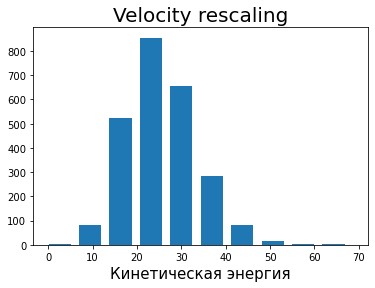

In [5]:
energy = np.loadtxt('et_vr_en.xvg')
kin = energy[:, 2]
plt.hist(kin, width=5)
plt.title('Velocity rescaling', fontsize=20)
plt.xlabel('Кинетическая энергия', fontsize=15)

Text(0.5, 0, 'Кинетическая энергия')

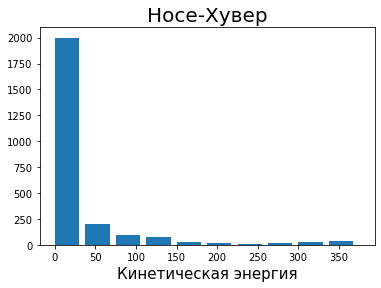

In [12]:
energy = np.loadtxt('et_nh_en.xvg')
kin = energy[:, 2]
plt.hist(kin, width=30)
plt.title('Ноcе-Хувер', fontsize=20)
plt.xlabel('Кинетическая энергия', fontsize=15)

Text(0.5, 0, 'Кинетическая энергия')

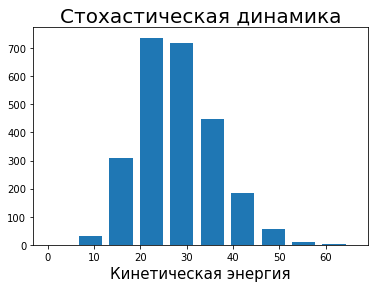

In [13]:
energy = np.loadtxt('et_sd_en.xvg')
kin = energy[:, 2]
plt.hist(kin, width=5)
plt.title('Стохастическая динамика', fontsize=20)
plt.xlabel('Кинетическая энергия', fontsize=15)

Мы видим, что на искомое распределение опять больше всего похожи данные полученные методами velocity rescaling и стохастической динамики. Если исходить из предположения, что в природе системы как правило эргодичны, эти два метода вновь оказываются предпочтительными.

## Выводы

Исходя из всего перечисленного выше мы считаем, что для моделирования нашей системы больше всего подходит термостатирование методами velocity rescaling и стохастической динамики. Разница между ними заключается в том, что в первом случае энергия идёт только на внутренние степени свободы молекулы, в то время как во втором ещё и на тепловое движение молекулы как целого, что больше похоже на реальное поведение нашей системы. По сути метод стохастической динамики позволяет моделировать движение нашей молекулы в том случае, если мы эксплицитно не задаём молекулы растворителя.

P.S. Почему же провалились другие два метода? Я попробовал найти ответ на этот вопрос и видимо дело обстоит так. Термостат Берендсена просто очень простой и примитивный, и его уже почти не используют (кроме каких-то предарительных расчётов), а вот термостат Носе-Хувера наоборот все очень хвалят и говорят, что мол один из самых точных методов. Однако судя по всему он не приспособлен для моделирования столь небольших систем: в его алгоритме зашито предположение об эргодиности системы, которое не выполняется в случае одной только молекулы этана.